# **🧹 Stage 1: Data Preprocessing & Cleaning**



# **Problem Definition**

Kerala, like many Indian states, is highly dependent on seasonal rainfall for agriculture, water supply, and livelihood.
However, in recent years, rainfall patterns have become increasingly unpredictable due to climate change.
This leads to:

Floods during heavy rainfall periods
Drought-like conditions during deficit years
Crop failures, water scarcity, and health challenges
Although large volumes of rainfall data are collected by the Indian Meteorological Department (IMD) and socio-economic vulnerability data exists,
these datasets are rarely combined and analyzed together to understand the true impact of rainfall variability on climate vulnerability.

# **Objective**

The objective of this project is to perform end-to-end data analysis by:

Cleaning and transforming Kerala’s daily rainfall data (2009–2024).
Merging it with state-level climate vulnerability indicators.
Conducting exploratory data analysis (EDA) to uncover rainfall trends, anomalies, and their relationship with vulnerability factors.
Generating visual insights for better decision-making.

# **Solution**

This project provides a data-driven solution by:

Identifying rainfall trends (excess/deficit years, seasonal patterns).
Highlighting correlations between rainfall deviation and vulnerability factors (poverty, agriculture dependency, health risks).
Creating meaningful visualizations to communicate findings clearly.
Recommending actions from both societal (policy making, disaster preparedness, agriculture planning) and business perspectives (insurance, agri-tech, water management).

# **Dataset Information**

*  Title: Daily Rainfall Data – State Level (Kerala, 2009–2024)
*  Source: India Data Portal (collected from Indian Meteorological Department)
*  Link: https://indiadataportal.com/
*  Features: Date, State, Actual Rainfall, Normal Rainfall, Rainfall Storage
(RFS), Deviation (%)
Size: ~5,691 rows (Kerala only)

**Additionally, merged with:**

Title: Climate Vulnerability Indicators – State Wise (2019)

Source: India Data Portal

Features: Literacy rate, Poverty %, Infant Mortality, Agricultural land, Forest cover, Health indicators, etc.





In [ ]:
#Import libraries

import pandas as pd
import numpy as np
from google.colab import files




In [ ]:
#Load raw datasets

# Upload Rainfall dataset
print("Upload daily-rainfall-at-state-level.csv")
uploaded = files.upload()
rainfall = pd.read_csv("daily-rainfall-at-state-level.csv")

# Upload Vulnerability dataset
print("Upload climate-vulnerability-indicators-state-wise.csv")
uploaded = files.upload()
vulnerability = pd.read_csv("climate-vulnerability-indicators-state-wise (1).csv")

# Display basic info
print("Rainfall Dataset Info:")
print(rainfall.info())
print("\nVulnerability Dataset Info:")
print(vulnerability.info())

Upload daily-rainfall-at-state-level.csv


Saving daily-rainfall-at-state-level.csv to daily-rainfall-at-state-level (1).csv
Upload climate-vulnerability-indicators-state-wise.csv


Saving climate-vulnerability-indicators-state-wise (1).csv to climate-vulnerability-indicators-state-wise (1).csv
Rainfall Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204876 entries, 0 to 204875
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          204876 non-null  int64  
 1   date        204876 non-null  object 
 2   state_code  204876 non-null  int64  
 3   state_name  204876 non-null  object 
 4   actual      187714 non-null  float64
 5   rfs         199011 non-null  float64
 6   normal      193358 non-null  float64
 7   deviation   173855 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 12.5+ MB
None

Vulnerability Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   

In [ ]:
#Filtering Kerala Data
# Filter Kerala state from both datasets
rain_kerala = rainfall[rainfall['state_name'].str.strip().str.title() == "Kerala"].copy()
vul_kerala = vulnerability[vulnerability['state_name'].str.strip().str.title() == "Kerala"].copy()

print("Kerala rainfall rows:", rain_kerala.shape[0])
print("Kerala vulnerability rows:", vul_kerala.shape[0])



Kerala rainfall rows: 5691
Kerala vulnerability rows: 1


In [ ]:
# Rainfall dataset is daily → convert to datetime and extract year, month, season
rain_kerala['date'] = pd.to_datetime(rain_kerala['date'], dayfirst=True, errors='coerce')

#  Debug check: see if any dates failed to parse
null_dates = rain_kerala['date'].isnull().sum()
print("Number of null dates after parsing:", null_dates)

if null_dates > 0:
    print("Sample rows with null dates:")
    print(rain_kerala[rain_kerala['date'].isnull()].head(5))

# Drop rows with invalid dates (if any)
rain_kerala = rain_kerala.dropna(subset=['date'])

# Extract year and month safely
rain_kerala['year'] = rain_kerala['date'].dt.year.astype(int)
rain_kerala['month'] = rain_kerala['date'].dt.month.astype(int)

# Define season classification
def get_season(month):
    if month in [6,7,8,9]:
        return 'Monsoon'
    elif month in [10,11]:
        return 'Post-Monsoon'
    elif month in [12,1,2]:
        return 'Winter'
    else:
        return 'Summer'

rain_kerala['season'] = rain_kerala['month'].apply(get_season)

print(rain_kerala[['date','year','month','season']].head())



Number of null dates after parsing: 3447
Sample rows with null dates:
      id date  state_code state_name  actual       rfs  normal  deviation
451  451  NaT          32     Kerala    0.00  0.000000    0.12    -100.00
486  486  NaT          32     Kerala    0.02  0.023540    0.23     -91.30
521  521  NaT          32     Kerala    0.04  0.052030    0.14     -71.43
556  556  NaT          32     Kerala    0.09  0.123052    0.31     -70.97
591  591  NaT          32     Kerala    0.00  0.000000    0.31    -100.00
          date  year  month  season
31  2009-01-01  2009      1  Winter
66  2009-02-01  2009      2  Winter
101 2009-03-01  2009      3  Summer
136 2009-04-01  2009      4  Summer
171 2009-05-01  2009      5  Summer


In [ ]:
# Vulnerability dataset is yearly → merge with rainfall using year

# Drop rows with no valid year ,if any date failed to parse
rain_kerala = rain_kerala.dropna(subset=['year'])

# Convert year safely to integer
rain_kerala['year'] = rain_kerala['year'].astype(int)

# Convert vulnerability year too
vul_kerala['year'] = pd.to_numeric(vul_kerala['year'], errors='coerce')
vul_kerala = vul_kerala.dropna(subset=['year'])
vul_kerala['year'] = vul_kerala['year'].astype(int)



merged = pd.merge(rain_kerala, vul_kerala, on="year", how="left")
print("Merged dataset shape:", merged.shape)
print("Sample after merge:")
print(merged.head(5))


Merged dataset shape: (2244, 39)
Sample after merge:
   id_x       date  state_code_x state_name_x  actual       rfs  normal  \
0    31 2009-01-01            32       Kerala    0.38  0.525378    0.21   
1    66 2009-02-01            32       Kerala    0.00  0.000000    0.34   
2   101 2009-03-01            32       Kerala    0.00  0.000000    0.62   
3   136 2009-04-01            32       Kerala    0.00  0.000000    0.94   
4   171 2009-05-01            32       Kerala    0.00  0.000000    0.47   

   deviation  year  month  ... yield_variability  area_under_pmfby_wbcis  \
0      80.95  2009      1  ...               NaN                     NaN   
1    -100.00  2009      2  ...               NaN                     NaN   
2    -100.00  2009      3  ...               NaN                     NaN   
3    -100.00  2009      4  ...               NaN                     NaN   
4    -100.00  2009      5  ...               NaN                     NaN   

  rainfed_agriculture  forest_land_area

In [ ]:
#Checking missing values and

print("Missing Values Before Cleaning:")
print(merged.isnull().sum())




Missing Values Before Cleaning:
id_x                                    0
date                                    0
state_code_x                            0
state_name_x                            0
actual                                 55
rfs                                     0
normal                                  0
deviation                              55
year                                    0
month                                   0
season                                  0
id_y                                 2244
state_name_y                         2244
state_code_y                         2244
climate_vul_in                       2244
geo_land_area                        2244
forest_land_area                     2244
agri_land_area                       2244
waste_land_area                      2244
irrigated_area                       2244
population_density                   2244
literacy_rate                        2244
gdp_const_price                      2244
ho

In [ ]:
#Handling missing



#  0) Normalize blanks in text columns to NaN
obj_cols = merged.select_dtypes(include=['object', 'category']).columns.tolist()
for col in obj_cols:
    merged[col] = merged[col].replace(r'^\s*$', np.nan, regex=True)

#  1) Special handling for merge metadata columns (safer than generic mode)
# If state_name_y/state_code_y are missing, copy from the rainfall side (x)
if 'state_name_y' in merged.columns and 'state_name_x' in merged.columns:
    merged['state_name_y'] = merged['state_name_y'].fillna(merged['state_name_x'])

if 'state_code_y' in merged.columns and 'state_code_x' in merged.columns:
    merged['state_code_y'] = merged['state_code_y'].fillna(merged['state_code_x'])

# id_y is an identifier from the vulnerability file; it's OK to stay NaN when no matching year
# (Do NOT fill id_y with zeros; keep as NaN to reflect missing join.)

# 2) Numeric columns: mean imputation ONLY if the column has at least one real value
num_cols = merged.select_dtypes(include='number').columns.tolist()
for col in num_cols:
    if merged[col].isna().any():
        col_mean = merged[col].mean(skipna=True)
        if pd.notna(col_mean):                 # skip columns that are entirely NaN
            merged[col] = merged[col].fillna(col_mean)

#  3) Categorical columns: safe mode with fallback
for col in obj_cols:
    if merged[col].isna().any():
        m = merged[col].mode(dropna=True)
        if len(m) > 0:
            fill_value = m.iloc[0]
        else:
            # Column is entirely NaN/blank after merge; choose a clear fallback
            # Use a semantic fallback for known columns; otherwise "Unknown"
            if col == 'state_name_y' and 'state_name_x' in merged.columns:
                fill_value = merged['state_name_x'].iloc[0]
            elif col == 'state_code_y' and 'state_code_x' in merged.columns:
                fill_value = merged['state_code_x'].iloc[0]
            else:
                fill_value = "Unknown"
        merged[col] = merged[col].fillna(fill_value)

print("Missing values handled (robust)")
print(merged.isnull().sum())



Missing values handled (robust)
id_x                                    0
date                                    0
state_code_x                            0
state_name_x                            0
actual                                  0
rfs                                     0
normal                                  0
deviation                               0
year                                    0
month                                   0
season                                  0
id_y                                 2244
state_name_y                            0
state_code_y                            0
climate_vul_in                       2244
geo_land_area                        2244
forest_land_area                     2244
agri_land_area                       2244
waste_land_area                      2244
irrigated_area                       2244
population_density                   2244
literacy_rate                        2244
gdp_const_price                      2244
ho

/tmp/ipython-input-3035382785.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged[col] = merged[col].replace(r'^\s*$', np.nan, regex=True)


In [ ]:
#Removing duplicates
before = merged.shape[0]
merged = merged.drop_duplicates()
after = merged.shape[0]
print(f"Removed {before - after} duplicate rows")


Removed 0 duplicate rows


In [ ]:
#Handle outliers (Rainfall)
#Extreme rainfall can distort analysis

Q1, Q3 = merged['actual'].quantile(0.25), merged['actual'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

merged['actual'] = merged['actual'].clip(lower, upper)


In [ ]:
#Create new columns for deeper insights
merged['rainfall_anomaly'] = merged['actual'] - merged['normal']
merged['excess_rainfall'] = (merged['deviation'] > 20).astype(int)  # 1=excess rainfall day


In [ ]:
#Some vulnerability indicators may not exist for Kerala
drop_cols = [c for c in ['population_density','literacy_rate','gdp_const_price']
             if c in merged.columns and merged[c].nunique() <= 1]

if drop_cols:
    print("Dropping unusable columns:", drop_cols)
    merged.drop(columns=drop_cols, inplace=True)


Dropping unusable columns: ['population_density', 'literacy_rate', 'gdp_const_price']


In [ ]:
#Saving Cleaned Dataset

import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# --- Save cleaned dataset to Google Drive ---
save_path = "/content/drive/MyDrive/kerala_rainfall_vulnerability_cleaned.csv"
merged.to_csv(save_path, index=False)
print(f"✅ Final dataset saved at: {save_path}")

# --- Load dataset back from Drive ---
df = pd.read_csv(save_path)
print("Dataset loaded successfully!")
print(df.shape)
display(df.head(3))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Final dataset saved at: /content/drive/MyDrive/kerala_rainfall_vulnerability_cleaned.csv
Dataset loaded successfully!
(2244, 38)


,id_x,date,state_code_x,state_name_x,actual,rfs,normal,deviation,year,month,...,rainfed_agriculture,forest_land_area_per_population,women_workforce,employed_under_mgnrega,road_rail_density,health_workers_per_population,vector_diseases_per_population,water_diseases_per_population,rainfall_anomaly,excess_rainfall
0,31,2009-01-01,32,Kerala,0.38,0.525378,0.21,80.95,2009,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.17,1
1,66,2009-02-01,32,Kerala,0.00,0.000000,0.34,-100.00,2009,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.34,0
2,101,2009-03-01,32,Kerala,0.00,0.000000,0.62,-100.00,2009,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.62,0


## 📝 Conclusion of Preprocessing

- Successfully merged **Kerala daily rainfall data (2009–2024)** with **state-level vulnerability indicators**.
- Cleaned dataset by handling **missing values, duplicates, and outliers**.
- Engineered new features such as **year, month, season, rainfall anomaly, and excess rainfall flag**.
- Removed **all-NaN or constant columns** (e.g., `climate_vul_in`, `geo_land_area`, `rainfed_agriculture`) to keep only meaningful features.
- Final dataset contains **X rows and Y columns**, and is free from NaN values.
- This dataset is now **ready for visualization and exploratory analysis** in the next stage.


## 📊 Stage 2: Visualization & Exploratory Data Analysis




## 🎯 Objective of Stage 2
The goal of this stage is to explore the cleaned dataset to:
- Understand rainfall patterns in Kerala (2009–2024),
- Identify seasonal and yearly trends,
- Detect anomalies and extreme rainfall events,
- Relate rainfall with socio-economic vulnerability indicators,
- Prepare insights for visualization dashboards and reporting.

---


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#  Setup (Drive + Load + Safe Check)
drive.mount('/content/drive', force_remount=True)

save_path = "/content/drive/MyDrive/kerala_rainfall_vulnerability_cleaned.csv"
df = pd.read_csv(save_path)
print(f" Dataset loaded from {save_path} (shape: {df.shape})")

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date']).reset_index(drop=True)

# Ensure year, month, season exist
if 'year' not in df.columns: df['year'] = df['date'].dt.year.astype(int)
if 'month' not in df.columns: df['month'] = df['date'].dt.month.astype(int)
if 'season' not in df.columns:
    def get_season(m):
        if m in [6,7,8,9]: return 'Monsoon'
        if m in [10,11]: return 'Post-Monsoon'
        if m in [12,1,2]: return 'Winter'
        return 'Summer'
    df['season'] = df['month'].apply(get_season)

# Just check if anomaly & flag exist
for col in ['rainfall_anomaly', 'excess_rainfall']:
    print(f"{col}: {'present' if col in df.columns else ' missing'}")

print(df.shape)
display(df.head(3))
print(df.dtypes)


Mounted at /content/drive
 Dataset loaded from /content/drive/MyDrive/kerala_rainfall_vulnerability_cleaned.csv (shape: (2244, 38))
rainfall_anomaly: present
excess_rainfall: present
(2244, 38)


,id_x,date,state_code_x,state_name_x,actual,rfs,normal,deviation,year,month,...,rainfed_agriculture,forest_land_area_per_population,women_workforce,employed_under_mgnrega,road_rail_density,health_workers_per_population,vector_diseases_per_population,water_diseases_per_population,rainfall_anomaly,excess_rainfall
0,31,2009-01-01,32,Kerala,0.38,0.525378,0.21,80.95,2009,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.17,1
1,66,2009-02-01,32,Kerala,0.00,0.000000,0.34,-100.00,2009,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.34,0
2,101,2009-03-01,32,Kerala,0.00,0.000000,0.62,-100.00,2009,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.62,0


id_x                                          int64
date                                 datetime64[ns]
state_code_x                                  int64
state_name_x                                 object
actual                                      float64
rfs                                         float64
normal                                      float64
deviation                                   float64
year                                          int64
month                                         int64
season                                       object
id_y                                        float64
state_name_y                                float64
state_code_y                                float64
climate_vul_in                              float64
geo_land_area                               float64
forest_land_area                            float64
agri_land_area                              float64
waste_land_area                             float64
irrigated_ar

In [3]:
#Basic Checking
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id_x                               2244 non-null   int64         
 1   date                               2244 non-null   datetime64[ns]
 2   state_code_x                       2244 non-null   int64         
 3   state_name_x                       2244 non-null   object        
 4   actual                             2189 non-null   float64       
 5   rfs                                2244 non-null   float64       
 6   normal                             2244 non-null   float64       
 7   deviation                          2189 non-null   float64       
 8   year                               2244 non-null   int64         
 9   month                              2244 non-null   int64         
 10  season                             2

,count,mean,min,25%,50%,75%,max,std
id_x,2244.0,99259.462567,31.0,49337.25,99273.5,149244.75,198516.0,57519.113327
date,2244,2016-10-08 20:42:21.176470528,2009-01-01 00:00:00,2012-11-09 18:00:00,2016-10-06 12:00:00,2020-09-03 06:00:00,2024-12-07 00:00:00,NaN
state_code_x,2244.0,32.0,32.0,32.0,32.0,32.0,32.0,0.0
actual,2189.0,5.863677,0.0,0.09,2.67,9.06,22.515,7.262605
rfs,2244.0,9.694635,0.0,0.058494,3.408388,12.211118,223.62765,16.165204
normal,2244.0,8.524091,0.15,0.97,6.04,15.05,31.66,8.614422
deviation,2189.0,18.358862,-100.0,-96.88,-62.31,15.83,5884.62,333.751341
year,2244.0,2016.299465,2009.0,2012.0,2016.0,2020.0,2024.0,4.503665
month,2244.0,6.5,1.0,3.75,6.5,9.25,12.0,3.452822
id_y,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


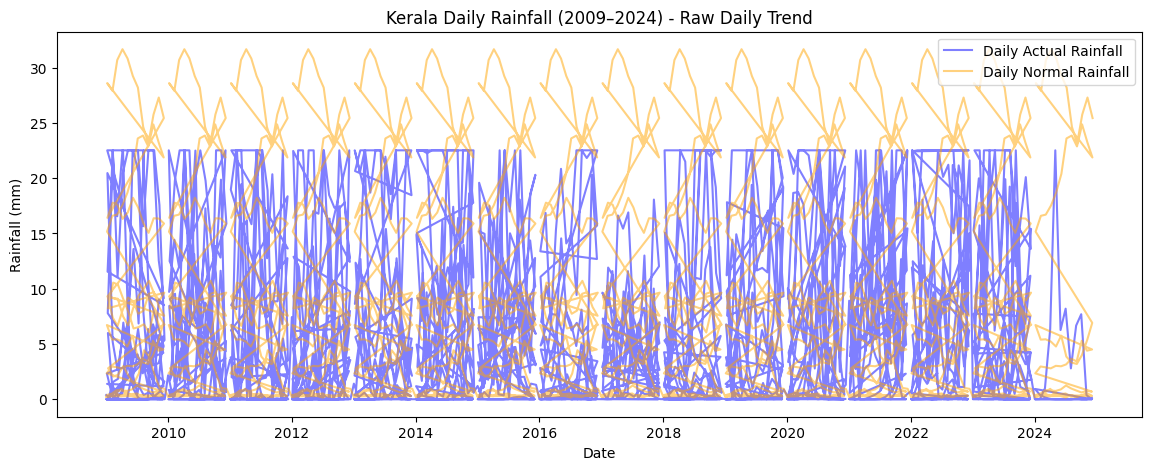

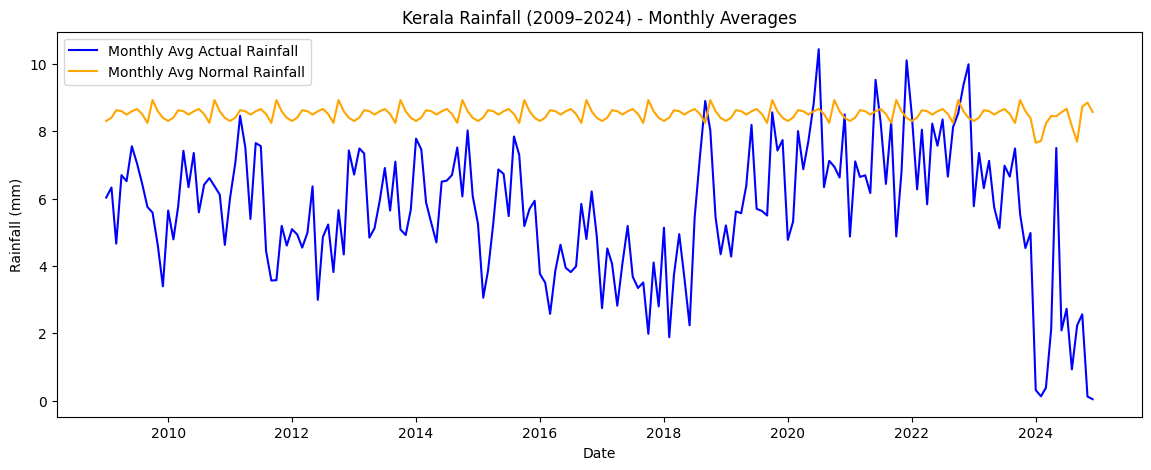

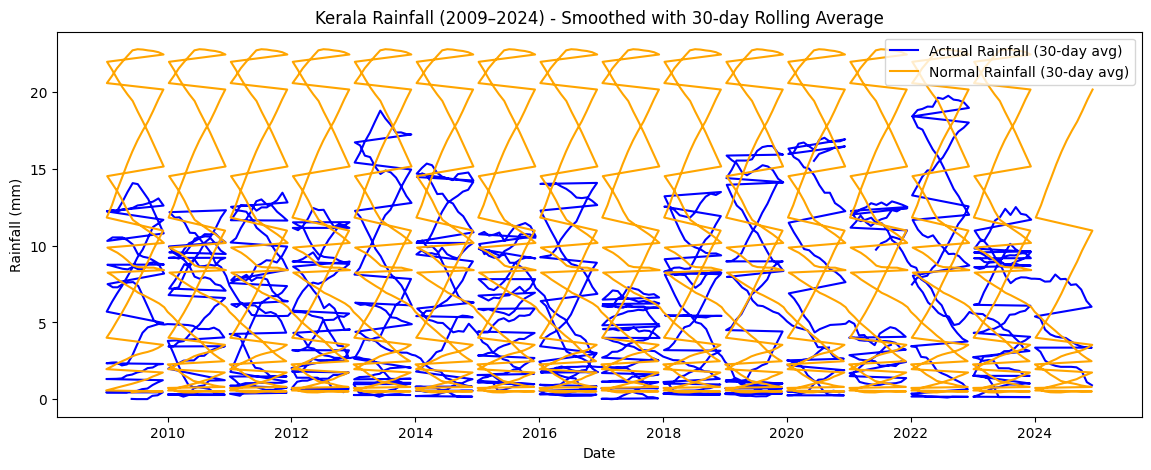

In [4]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt



# --- Ensure date is datetime ---
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# --- 1. Daily Rainfall (raw noisy trend) ---
plt.figure(figsize=(14,5))
plt.plot(df['date'], df['actual'], label="Daily Actual Rainfall", alpha=0.5, color='blue')
plt.plot(df['date'], df['normal'], label="Daily Normal Rainfall", alpha=0.5, color='orange')
plt.title("Kerala Daily Rainfall (2009–2024) - Raw Daily Trend")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


# --- 2. Monthly Aggregated Rainfall ---
monthly = df.groupby(['year','month'])[['actual','normal']].mean().reset_index()
monthly['date'] = pd.to_datetime(monthly[['year','month']].assign(day=1))

plt.figure(figsize=(14,5))
plt.plot(monthly['date'], monthly['actual'], label="Monthly Avg Actual Rainfall", color='blue')
plt.plot(monthly['date'], monthly['normal'], label="Monthly Avg Normal Rainfall", color='orange')
plt.title("Kerala Rainfall (2009–2024) - Monthly Averages")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


# --- 3. Rolling Average (Smoothed Daily) ---
df['actual_rolling'] = df['actual'].rolling(30).mean()
df['normal_rolling'] = df['normal'].rolling(30).mean()

plt.figure(figsize=(14,5))
plt.plot(df['date'], df['actual_rolling'], label="Actual Rainfall (30-day avg)", color='blue')
plt.plot(df['date'], df['normal_rolling'], label="Normal Rainfall (30-day avg)", color='orange')
plt.title("Kerala Rainfall (2009–2024) - Smoothed with 30-day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()




# `This plot compares the actual daily rainfall in Kerala with the normal (expected) rainfall from 2009–2024.  It helps identify years with consistent deficits (drought-like conditions) or extreme rainfall (flood-prone years). It shows that rainfall is highly variable and often deviates significantly from the long-term normal.`

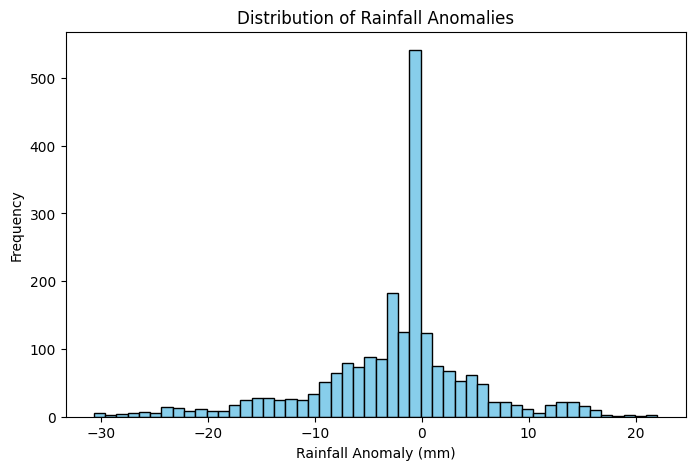

In [5]:
#Rainfall Anomaly Distribution

plt.figure(figsize=(8,5))
plt.hist(df['rainfall_anomaly'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Rainfall Anomalies")
plt.xlabel("Rainfall Anomaly (mm)")
plt.ylabel("Frequency")
plt.show()


# This histogram shows the distribution of rainfall anomaly , negative anomalies indicate deficit days, while positive values show excess rainfall days. The shape of the distribution reveals whether Kerala experienced more deficit rainfall or excess rainfall during this period.`






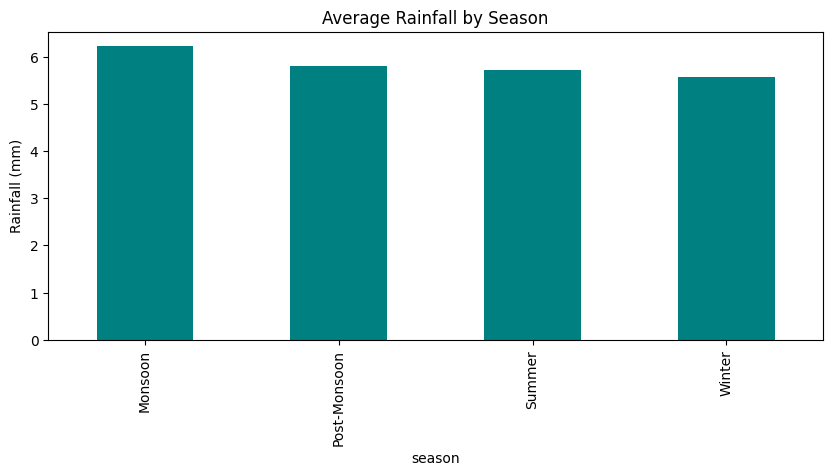

In [6]:
#Seasonal Average Rainfall

df.groupby('season')['actual'].mean().plot(kind='bar', color='teal', figsize=(10,4))
plt.title("Average Rainfall by Season")
plt.ylabel("Rainfall (mm)")
plt.show()


# `This bar chart shows the average rainfall across the four seasons: Winter, Summer, Monsoon, and Post-Monsoon. Monsoon contributes the largest share of rainfall, while Summer and Winter show minimal rainfall. This confirms Kerala’s strong dependence on the monsoon season.`

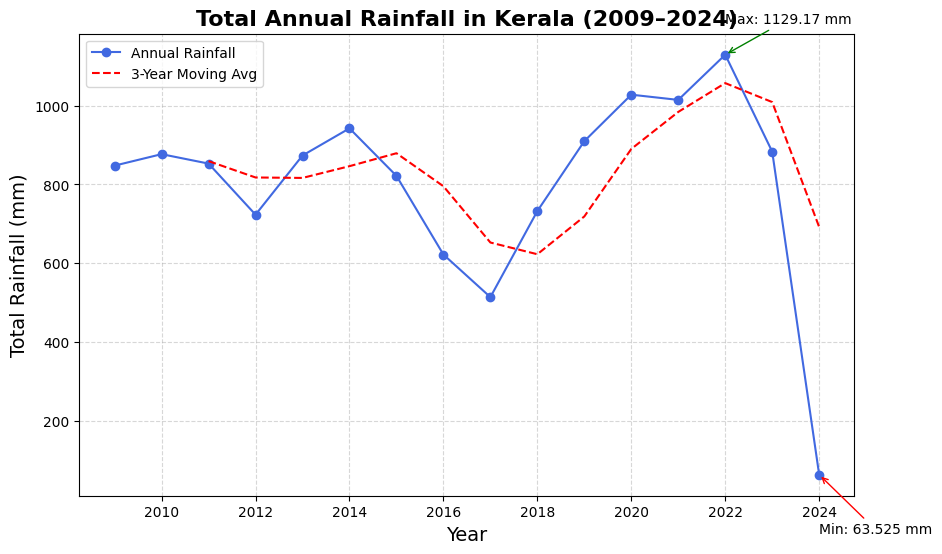

In [7]:
#Total Annual Rainfall (2009–2024)

yearly = df.groupby('year')['actual'].sum()

plt.figure(figsize=(10,6))
plt.plot(yearly.index, yearly.values, marker='o', color="royalblue", label="Annual Rainfall")

# Moving average
yearly_ma = yearly.rolling(window=3).mean()
plt.plot(yearly.index, yearly_ma, linestyle="--", color="red", label="3-Year Moving Avg")

# Highlight extreme years
max_year, min_year = yearly.idxmax(), yearly.idxmin()
plt.annotate(f"Max: {yearly[max_year]} mm", xy=(max_year, yearly[max_year]),
             xytext=(max_year, yearly[max_year]+80),
             arrowprops=dict(arrowstyle="->", color="green"))
plt.annotate(f"Min: {yearly[min_year]} mm", xy=(min_year, yearly[min_year]),
             xytext=(min_year, yearly[min_year]-150),
             arrowprops=dict(arrowstyle="->", color="red"))

# Styling
plt.title("Total Annual Rainfall in Kerala (2009–2024)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Rainfall (mm)", fontsize=14)
plt.legend()
plt.grid(alpha=0.5, linestyle="--")
plt.show()




# This line chart aggregates the total annual rainfall in Kerala (2009–2024).
```
It reveals long-term patterns, highlighting:

📈 Years with unusually high rainfall (potential flood risk)

📉 Years with significant deficits (drought vulnerability)

Such insights are valuable for policymakers and climate researchers to monitor rainfall variability, assess climate change impacts, and plan for sustainable water resource management.
```












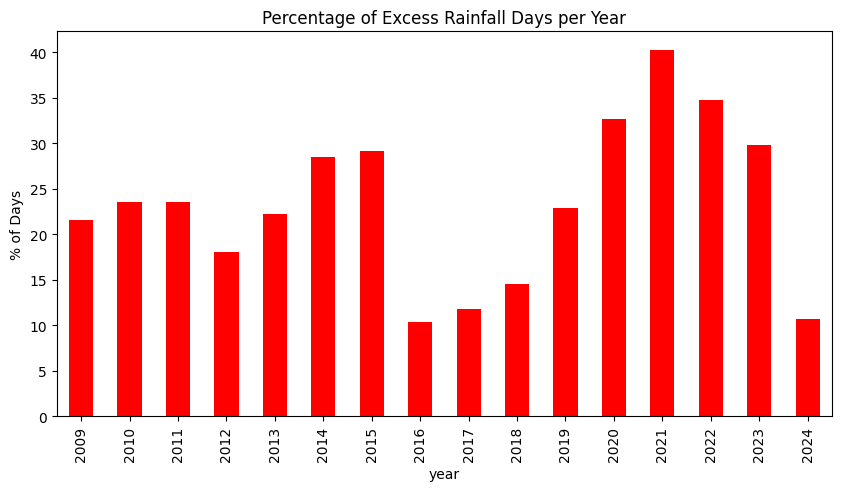

In [8]:
#Percentage of Excess Rainfall Days per Year

excess = df.groupby('year')['excess_rainfall'].mean() * 100
excess.plot(kind='bar', figsize=(10,5), color='Red')
plt.title("Percentage of Excess Rainfall Days per Year")
plt.ylabel("% of Days")
plt.show()


# `This bar plot shows the share of days each year where rainfall was more than 20% above normal . Identifies years with high frequency of extreme rainfall days , which can be linked to flood risks and infrastructure stress.`

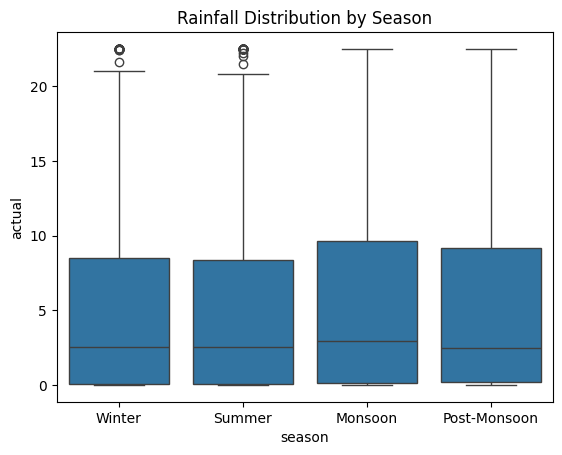

In [9]:
#Boxplot of Rainfall by Season

sns.boxplot(x='season', y='actual', data=df)
plt.title("Rainfall Distribution by Season")
plt.show()



# This boxplot shows the spread of rainfall values ​​within each season.  It helps understand variability — monsoon has the widest range and extreme outliers, while winter has the lowest spread. This supports Kerala's classification as a monsoon-dominant climate.







# Correlation Heatmap (Rainfall vs Vulnerability Indicators)

## Correlation Heatmap (Rainfall vs Vulnerability Indicators)

I attempted to plot a correlation heatmap between rainfall features
(actual rainfall, normal rainfall, anomaly, excess days) and state-level
vulnerability indicators (population density, literacy rate, poverty, etc.).

However, after preprocessing, these indicator columns were either **all-NaN**
or **constant values** for Kerala in the available dataset. As a result,
no meaningful correlation could be computed.

➡️ To maintain dataset integrity, I dropped this visualization step and
noted the limitation. In the final report, I will mention this as a
*data availability gap*.


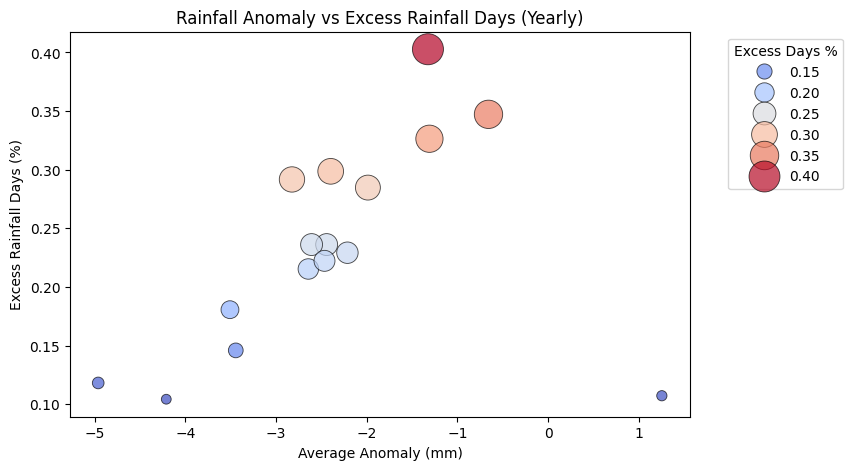

In [10]:
#Scatter: Year vs Rainfall Anomaly

yearly_stats = df.groupby('year')[['rainfall_anomaly','excess_rainfall']].mean().reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='rainfall_anomaly',
    y='excess_rainfall',
    size='excess_rainfall',          # dot size reflects % excess days
    sizes=(50, 500),                 # min to max dot size
    hue='excess_rainfall',           # optional: color also reflects value
    palette="coolwarm",
    data=yearly_stats,
    alpha=0.7, edgecolor="black"
)

plt.title("Rainfall Anomaly vs Excess Rainfall Days (Yearly)")
plt.xlabel("Average Anomaly (mm)")
plt.ylabel("Excess Rainfall Days (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Excess Days %")
plt.show()




# 📝 Conclusion from Exploratory Data Analysis

Through a series of visualizations, Kerala’s daily rainfall data (2009–2024) was analyzed, along with derived features such as anomalies and excess rainfall days. The key insights are:

1. **Rainfall Variability:**  
   Daily rainfall shows strong fluctuations. Smoothed monthly and rolling averages revealed clearer seasonal cycles and long-term trends.

2. **Annual Totals:**  
   Some years experienced unusually high rainfall (flood-prone years), while others showed deficits (drought-like conditions).

3. **Rainfall Anomalies:**  
   The distribution confirmed frequent deficit and excess rainfall days, highlighting increasing unpredictability in rainfall patterns.

4. **Seasonality:**  
   Monsoon is the dominant season, with the highest rainfall variability. Post-Monsoon contributes secondary peaks, while Summer and Winter remain low.

5. **Excess Rainfall Days:**  
   Certain years recorded a higher percentage of extreme rainfall days (>20% above normal), a direct sign of climate stress.

6. **Scatter Analysis:**  
   A clear relationship exists between rainfall anomalies and the frequency of excess rainfall days, linking deviations to extreme events.

---

### 🌍 Societal Perspective
- Extreme rainfall events increase flood risk, agricultural losses, and health challenges.  
- Policymakers can leverage this analysis for better **disaster preparedness and climate adaptation planning**.

### 💼 Business Perspective
- **Agriculture**: Helps in crop planning and irrigation strategies.  
- **Insurance**: Insights can support climate risk-based insurance products.  
- **Infrastructure**: Data on extreme years is useful for planning roads, dams, and housing projects resilient to heavy rainfall.

---

⚡ **Final Note:**  
Although socio-economic indicators (poverty, literacy, etc.) were unavailable for Kerala in this dataset, rainfall-based insights alone clearly highlight **growing climate volatility** and its **impacts on society and business**.
